In [56]:
import pandas as pd
# reading from the csv file
model_df=pd.read_csv('all_scores.csv')
model_df.head()

,Unnamed: 0,sources,titles,contents,date,authors,urls,texts,cleaned_text,textblob_score,google_score,google_joe,google_bernie,google_warren,google_pete,google_mike
0,0,Associated Press,Guest lineups for the Sunday news shows,WASHINGTON (AP) Guest lineups for the Sunday n...,2020-03-27T22:56:58Z,NaN,https://apnews.com/beafbe1d484050ac97438c7bd6a...,Guest lineups for the Sunday news shows\n\nWAS...,guest lineups for the sunday news shows washi...,0.026263,0.1,0.0,0.0,0.0,0.0,0.0
1,1,Associated Press,Country singer Joe Diffie tests positive for c...,"NASHVILLE, Tenn. (AP) A publicist for Joe Diff...",2020-03-27T19:33:49Z,By KRISTIN M. HALL AP Entertainment Writer,https://apnews.com/3e2edb7ce690346df645d79dae4...,"FILE - This Aug. 22, 2018 file photo shows Joe...","file - this aug. 22, 2018 file shows joe dif...",0.146571,0.1,0.0,0.0,0.0,0.0,0.0
2,2,Associated Press,Milwaukee's black community hit hard by corona...,"MADISON, Wis. (AP) Deaths and confirmed cases ...",2020-03-27T17:22:54Z,By SCOTT BAUER Associated Press,https://apnews.com/b52e4e9a63d64e3a25109f09010...,The onramp to the Hoan Bridge is void of traff...,the onramp to the hoan bridge is void of traff...,0.026944,-0.1,0.0,0.0,0.0,0.0,0.0
3,3,Associated Press,"Column: As we battle virus, don't forget 1919 ...","After a week of travel, which included a coupl...",2020-03-27T21:47:11Z,PAUL NEWBERRY AP Sports Columnist,https://apnews.com/6f1fef1bcf19f9b0eb9cd8bce39...,"FILE - In this Feb. 4, 2005, file photo, the i...","file - in this feb. 4, 2005, file , the inscr...",-0.018783,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Breitbart News,"Joe Rogan Worried by 'Old,' 'Stumbling' Biden:...",Podcast host Joe Rogan blasted the Democrat Pa...,2020-03-27T15:29:30Z,"Hannah Bleau, Hannah Bleau",https://www.breitbart.com/politics/2020/03/27/...,Podcast host Joe Rogan blasted the Democrat Pa...,podcast host joe rogan blasted the democrat pa...,0.051391,-0.2,-0.5,-0.3,0.0,0.0,0.0


In [59]:

X=model_df['cleaned_text']
# the first target
y_blob=model_df['textblob_score']

In [13]:
# defining the tockenizer and the auxiliary method for the lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords 
import string

import re
ENGLISH_STOP_WORDS = stopwords.words('english')
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
   
    return tag_dict.get(tag, wordnet.NOUN)
def my_tokenizer(sentence):
    # cleaning the text
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    rem_url=re.sub(r'http\S+', ' ',cleantext)
    rem_num = re.sub('[0-9]+', ' ', rem_url)
    s =re.sub('\s+', ' ', rem_num)
    t = str.maketrans("\n\t\r", "   ")
    s = s.translate(t)
    sentence=s
    sentence=sentence.lower()
    sentence=sentence.replace("n't",' not')
   
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,' ').lower()
    # split sentence into words
    listofwords = sentence.split(' ')
    listoflemmatized_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # lematize words
            lemmatized_word = lemmatizer.lemmatize(word,get_wordnet_pos(word))
            listoflemmatized_words.append(lemmatized_word)

    return listoflemmatized_words

In [60]:
### implementing tf-idf vectorizer 

from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize  

from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = WordNetLemmatizer()


vectorizer1 = TfidfVectorizer(min_df=5,tokenizer=my_tokenizer, stop_words="english")


v_data = vectorizer1.fit_transform(X)


df_data=  pd.DataFrame(columns=vectorizer1.get_feature_names(), data=v_data.toarray())



In [66]:

import numpy as np
# changing continus values into 3 classes (-1 for negative sentiment, 0 for anything close to neutral, +1 for positive sentiment)
y_blob_class=np.where(abs(y_blob)<0.25, 0,y_blob)
y_blob_class=np.where(y_blob_class>=0.25, 1,y_blob_class)
y_blob_class=np.where(y_blob_class<=-0.25,- 1,y_blob_class)


In [70]:
#implementing the logistic regression model
from sklearn.linear_model import LogisticRegression
mylogreg = LogisticRegression()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# using Grid search to optimize C and the solver
from sklearn.model_selection import RandomizedSearchCV 
parameters = {'solver':('lbfgs', 'newton-cg','sag'), 'C':[1, 10,100,1000, 10000]}
grid_search = RandomizedSearchCV(mylogreg, parameters, cv=3)

fittedgrid=grid_search.fit(df_data, y_blob_class)

In [ ]:
#grid search best estimators 
fittedgrid.best_estimator_

The best estimators in this case are lbfgs solver and C=10

In [73]:
#repeating the above for train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=5)


v_train= vectorizer1.fit_transform(X_train)
v_test = vectorizer1.transform(X_test)

df_train=  pd.DataFrame(columns=vectorizer1.get_feature_names(), data=v_train.toarray())
df_test =  pd.DataFrame(columns=vectorizer1.get_feature_names(), data=v_test.toarray())

In [74]:
y_train_class=np.where(abs(y_train)<0.25, 0,y_train)
y_train_class=np.where(y_train_class>=0.25, 1,y_train_class)
y_train_class=np.where(y_train_class<=-0.25,- 1,y_train_class)


y_test_class=np.where(abs(y_test)<0.25, 0,y_test)
y_test_class=np.where(y_test_class>=0.25, 1,y_test_class)
y_test_class=np.where(y_test_class<=-0.25,- 1,y_test_class)

In [75]:
mylogreg=LogisticRegression(C=10)
mylogregresults=mylogreg.fit(df_train,y_train_class)

In [76]:
# Our model evaluation scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred=mylogreg.predict(df_test)
print(accuracy_score(y_test_class, y_pred))
print(precision_score(y_test_class, y_pred, average="macro"))
print(recall_score(y_test_class, y_pred, average="macro"))

0.8647728291065507
0.8501550604161009
0.6957503136602691


Plotting the words with the highest impact on the score

In [81]:
# storing each word in the vectorized df with its coefficient calculated by the logistic regression model
dicts_blob_all = {}
dicts_blob_pos = {}
dicts_blob_neg = {}
dfkeys=df_train.copy()
keys = dfkeys.columns


for i in range(0,len(keys)):
    val=mylogregresults.coef_[0][i]
    dicts_blob_all[keys[i]] = abs(val)
    if (val>=0):
        dicts_blob_pos[keys[i]] = (val)
    else :
        dicts_blob_neg[keys[i]] = abs(val)

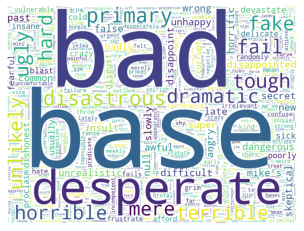

In [83]:
# The words with the largest absolute coefficient
from wordcloud import WordCloud
import matplotlib.pyplot as plt


w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_blob_all)
plt.imshow(w)
plt.axis("off")
plt.show()

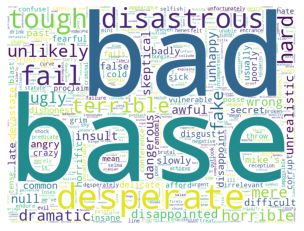

In [84]:
# The words with the largest positive coefficient
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_blob_pos)
plt.imshow(w)
plt.axis("off")
plt.show()

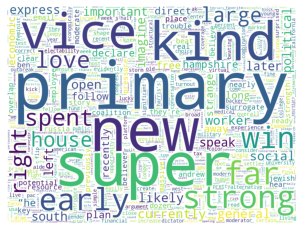

In [85]:
# The words with the largest negative coefficients
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_blob_neg)
plt.imshow(w)
plt.axis("off")
plt.show()

Repeating the above for the google score:

In [86]:
y_google=model_df['google_score']

In [87]:
y_google_class=np.where(abs(y_google)<0.25, 0,y_google)
y_google_class=np.where(y_google_class>=0.25, 1,y_google_class)
y_google_class=np.where(y_google_class<=-0.25,- 1,y_google_class)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y_google, test_size=0.3, random_state=5)
y_google_train=np.where(abs(y_train)<0.25, 0,y_train)
y_google_train=np.where(y_google_train>=0.25, 1,y_google_train)
y_google_train=np.where(y_google_train<=-0.25,- 1,y_google_train)


y_google_test=np.where(abs(y_test)<0.25, 0,y_test)
y_google_test=np.where(y_google_test>=0.25, 1,y_google_test)
y_google_test=np.where(y_google_test<=-0.25,- 1,y_google_test)

In [ ]:
mylogreg = LogisticRegression()
parameters = {'solver':('lbfgs', 'newton-cg','sag'), 'C':[1, 10,100,1000, 10000]}
grid_search = RandomizedSearchCV(mylogreg, parameters, cv=3)

fittedgrid_google=grid_search.fit(df_data, y_google_class)
fittedgrid_google.best_estimator_

the best estimator was again lbfgs and C=10

In [97]:
mylogreg_gg=LogisticRegression(C=10)
mylogregresults=mylogreg_gg.fit(df_train,y_google_train)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred=mylogreg_gg.predict(df_test)
print(accuracy_score(y_google_test, y_pred))
print(precision_score(y_google_test, y_pred, average="macro"))
print(recall_score(y_google_test, y_pred, average="macro"))

0.8568075117370892
0.5797891484300248
0.5604232804232804


I wanted to know why the precision and recall were low in this case:

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(y_google_train)
plt.show()

we can see that less articles had a score between 0.25 and 1 (very few are in class +1)

In [110]:
#saving the words weights in dictionaries
dicts_gg_all = {}
dicts_gg_pos = {}
dicts_gg_neg = {}
dfkeys=df_gtrain.copy()

keyss = dfkeys.columns


for i in range(0,len(keyss)):
    coeff_val=mylogregresults.coef_[0][i]
    dicts_gg_all[keyss[i]] = abs(coeff_val)
    if (coeff_val>=0):
        dicts_gg_pos[keyss[i]] = coeff_val
    else :
        dicts_gg_neg[keyss[i]] = abs(coeff_val)

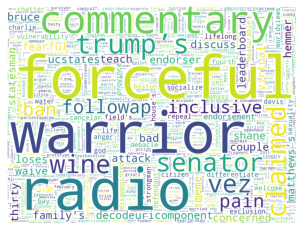

In [111]:
# the words with the largest absolute coefficient according to the logistic regression model fit on the google score target
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_gg_all)
plt.imshow(w)
plt.axis("off")
plt.show()

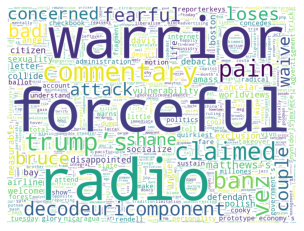

In [112]:
# the words with the largest positive coefficient according to the logistic regression model fit on the google score target
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_gg_pos)
plt.imshow(w)
plt.axis("off")
plt.show()

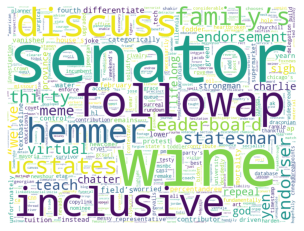

In [113]:
# the words with the largest negative coefficient according to the logistic regression model fit on the google score target
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dicts_gg_neg)
plt.imshow(w)
plt.axis("off")
plt.show()

Plotting the words which were used the most using the count vectorizer counts

In [114]:

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=my_tokenizer, stop_words="english")


v_count = count_vectorizer.fit_transform(X)


df_count=  pd.DataFrame(columns=count_vectorizer.get_feature_names(), data=v_count.toarray())


In [117]:
#saving the words frequencies in count_dict
count_dict={}
dfkeys=df_count.copy()
keys = dfkeys.columns

for i in range(0,len(keys)):
    
        count_dict[keys[i]] = df_count[keys[i]].sum()

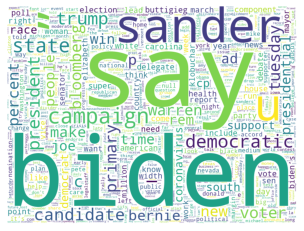

In [118]:
#plotting the most repeated 2000 words using WordCloud
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(count_dict)
plt.imshow(w)
plt.axis("off")
plt.show()